In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import neurokit2 as nk
%matplotlib inline

In [2]:
responses_dir = "../../data/input/gt/"
responses = pd.read_csv(responses_dir + "answers.csv")

In [19]:
df = responses[responses['question'] == 1]
df = df[df['answer'].notna()]
df.columns
df.rename(columns={'doc': 'Document', 'answer': 'Interest'}, inplace=True)

In [20]:
df1 = df[(df.Document != 19) & (df.Document != 20)]
df1

,participant,Document,question,Interest,correct
0,p01,1,1,2.0,NaN
6,p01,2,1,3.0,NaN
12,p01,3,1,2.0,NaN
18,p01,4,1,2.0,NaN
24,p01,5,1,4.0,NaN
...,...,...,...,...,...
1758,p15,14,1,3.0,NaN
1764,p15,15,1,3.0,NaN
1770,p15,16,1,2.0,NaN
1776,p15,17,1,2.0,NaN


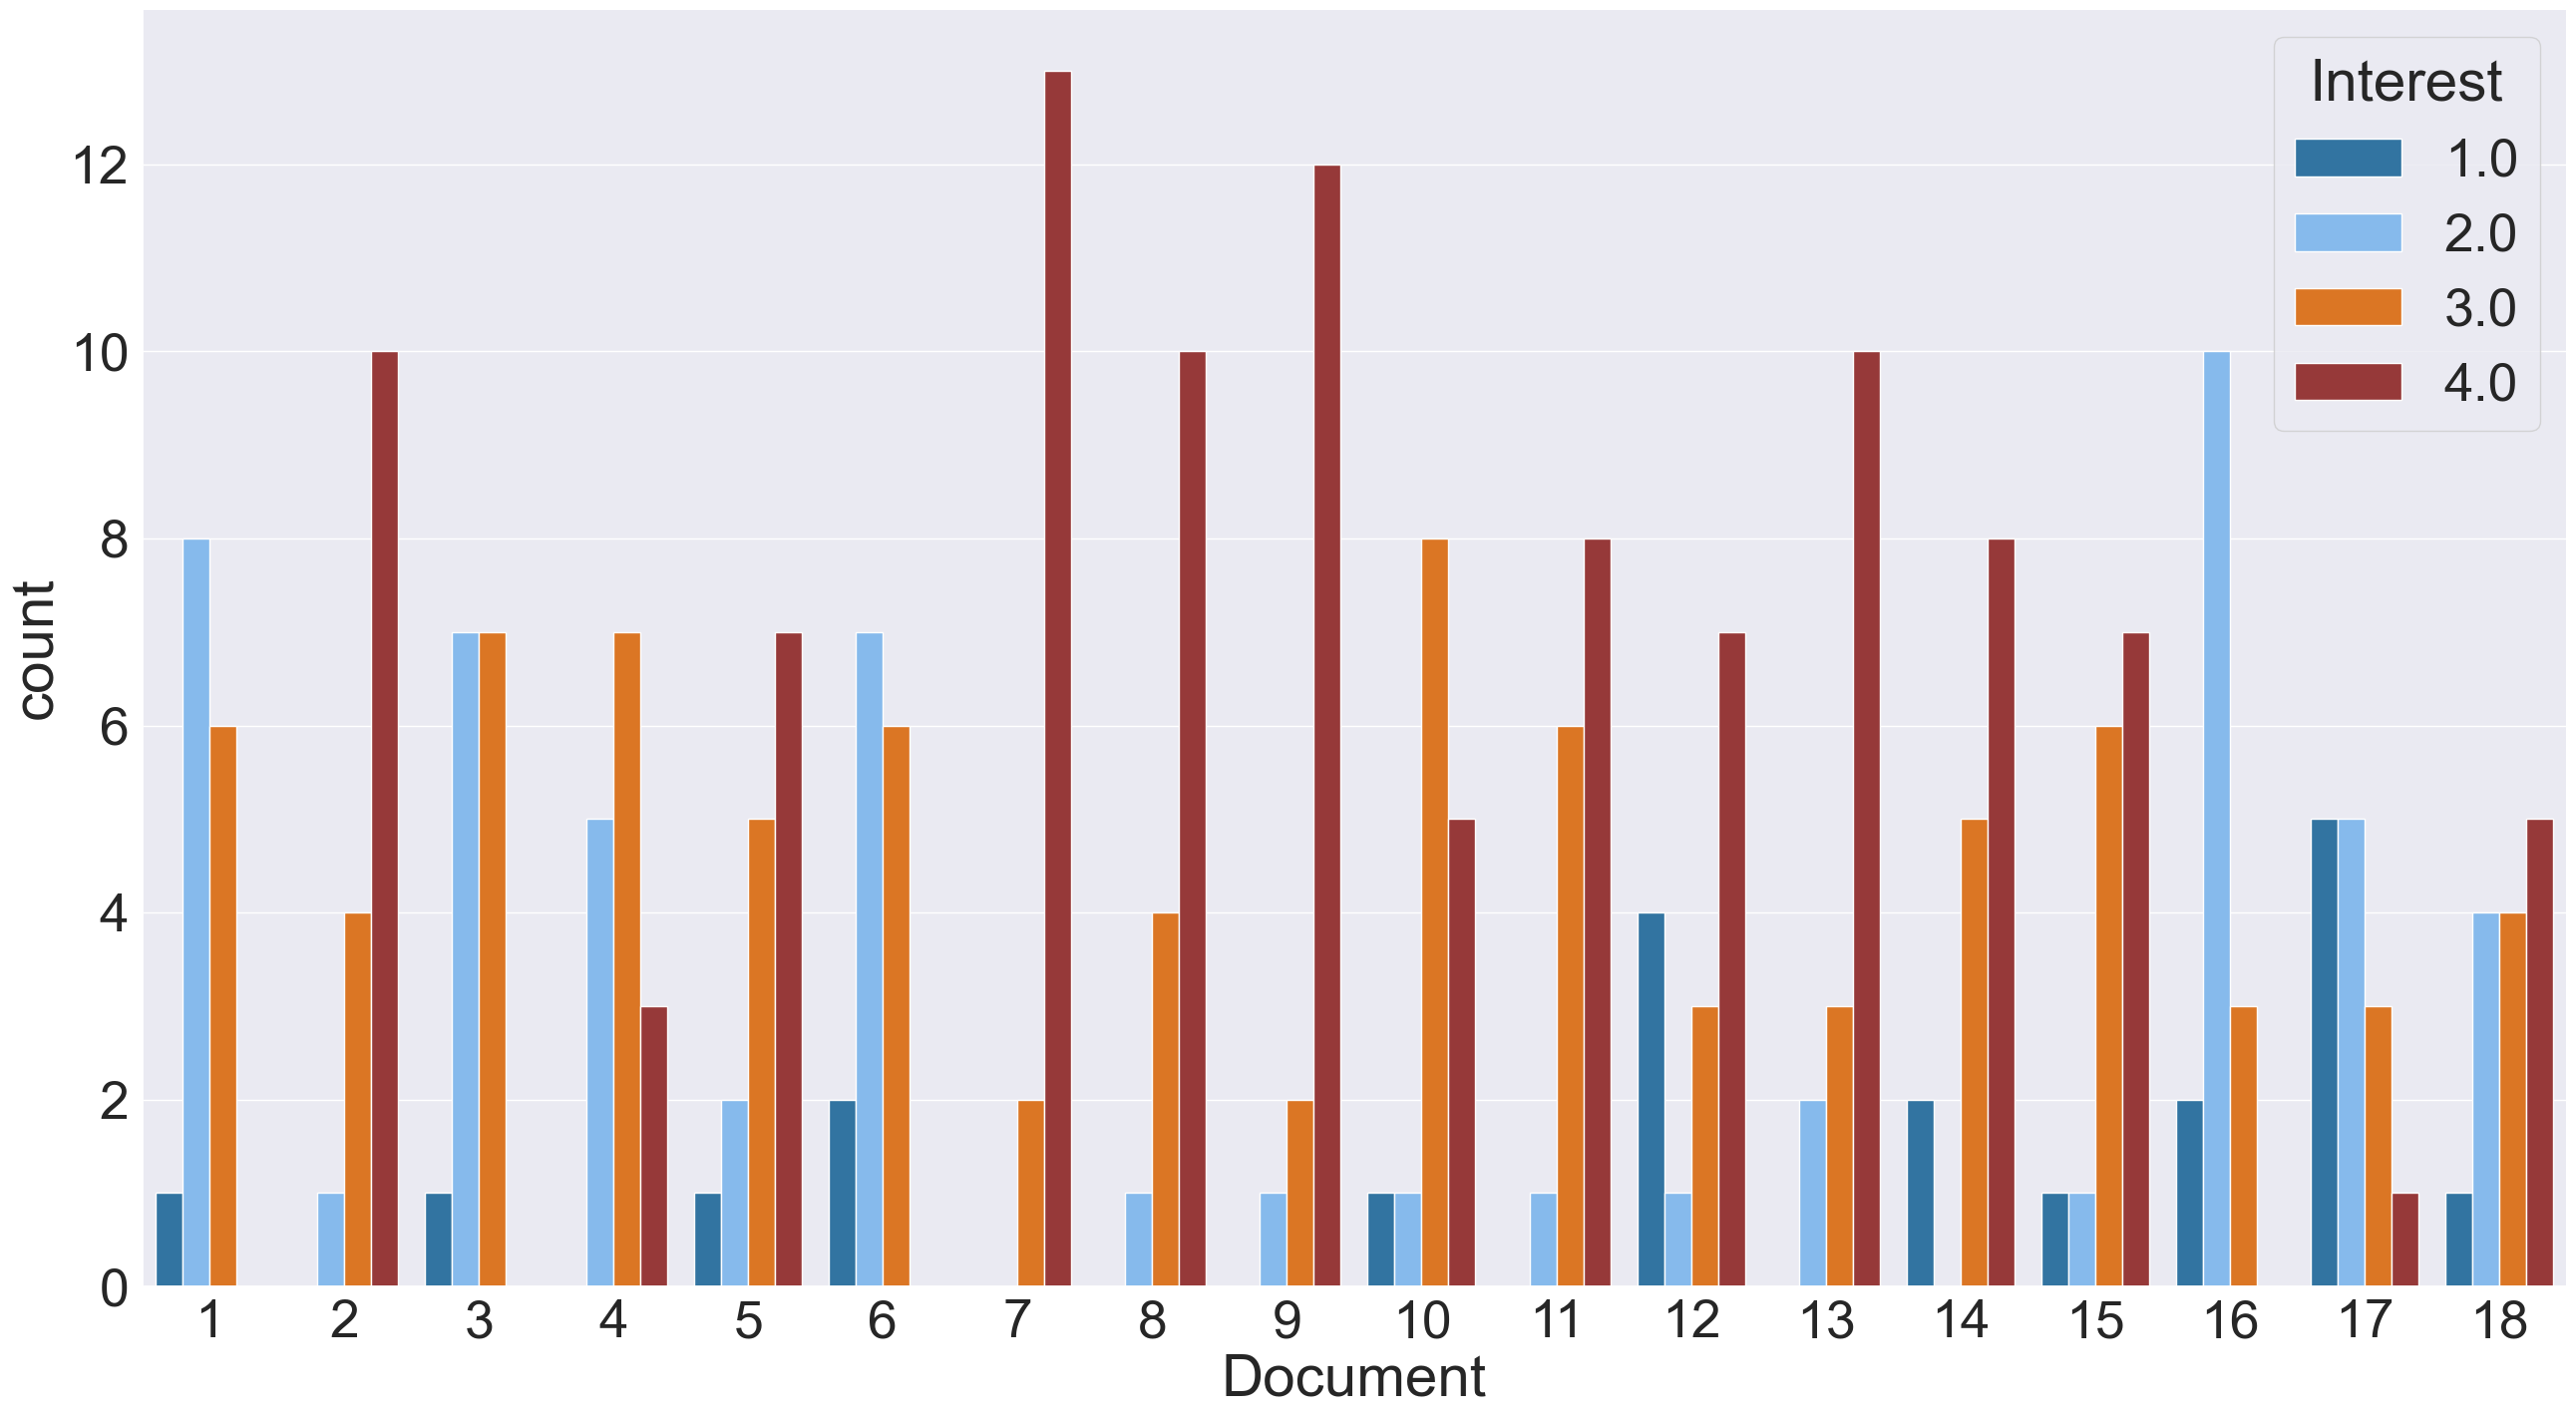

In [29]:
sns.set(font_scale=3.5)
palette = ['tab:blue', 'xkcd:sky blue', '#F97306', '#A52A2A']

sns.catplot(x="Document", hue="Interest", kind="count", palette=palette,
           data=df1, height=15.27, aspect=35.7/20.27, legend_out=False)
#plt.legend(loc='upper left')
plt.savefig("/Users/jai/Documents/IEEE-Interest/plots/Document_ratings.pdf", bbox_inches='tight')

In [286]:
#participant 2 and document 7 : high interest
main_dir = "/Users/jai/Documents/IEEE-Interest/interest/analysis/data/output/"
dir = main_dir + "E4_comb_mods/"

eda_df = pd.read_csv(dir + "p11_EDA.csv", index_col=0)
temp_df = pd.read_csv(dir + "p11_TEMP.csv", index_col=0)
bvp_df = pd.read_csv(dir + "p11_BVP.csv", index_col=0)
hr_df = pd.read_csv(dir + "p11_HR.csv", index_col=0)

In [12]:
X

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [287]:
eda_x = eda_df.timestamp.values
temp_x = temp_df.timestamp.values
bvp_x = bvp_df.timestamp.values
hr_x = hr_df.timestamp.values

eda_y = eda_df.data.values
temp_y = temp_df.data.values
bvp_y = bvp_df.data.values
hr_y = hr_df.data.values

<AxesSubplot:xlabel='timestamp', ylabel='data'>

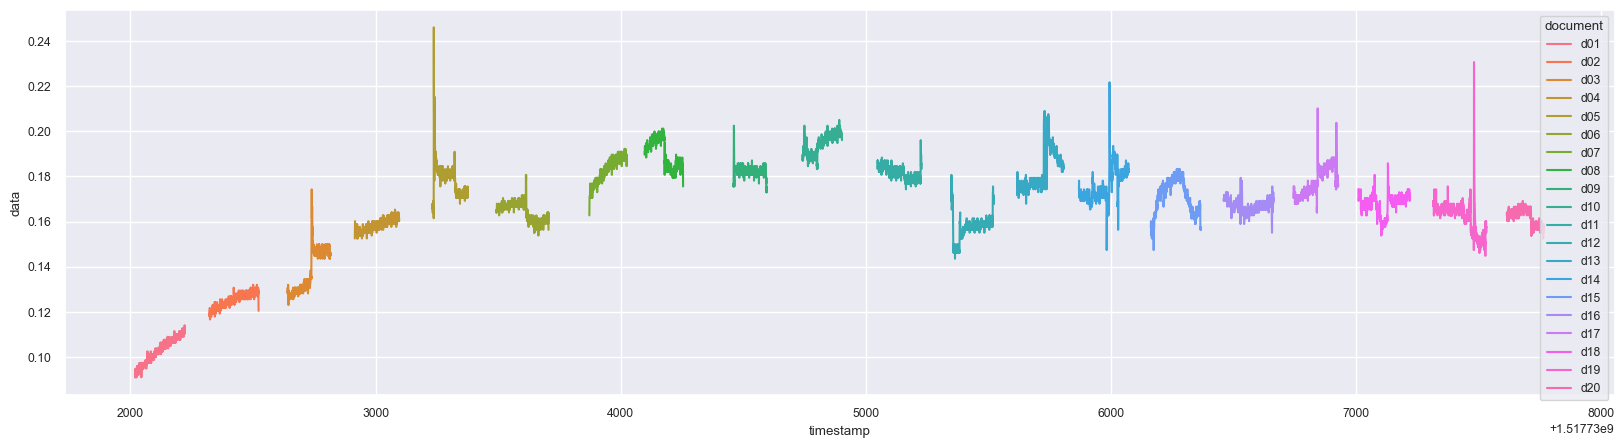

In [288]:
plt.figure(figsize=(20,5))
sns.lineplot(data=eda_df, x=eda_df['timestamp'], y=eda_df['data'], hue=eda_df['document'])

<AxesSubplot:xlabel='timestamp', ylabel='data'>

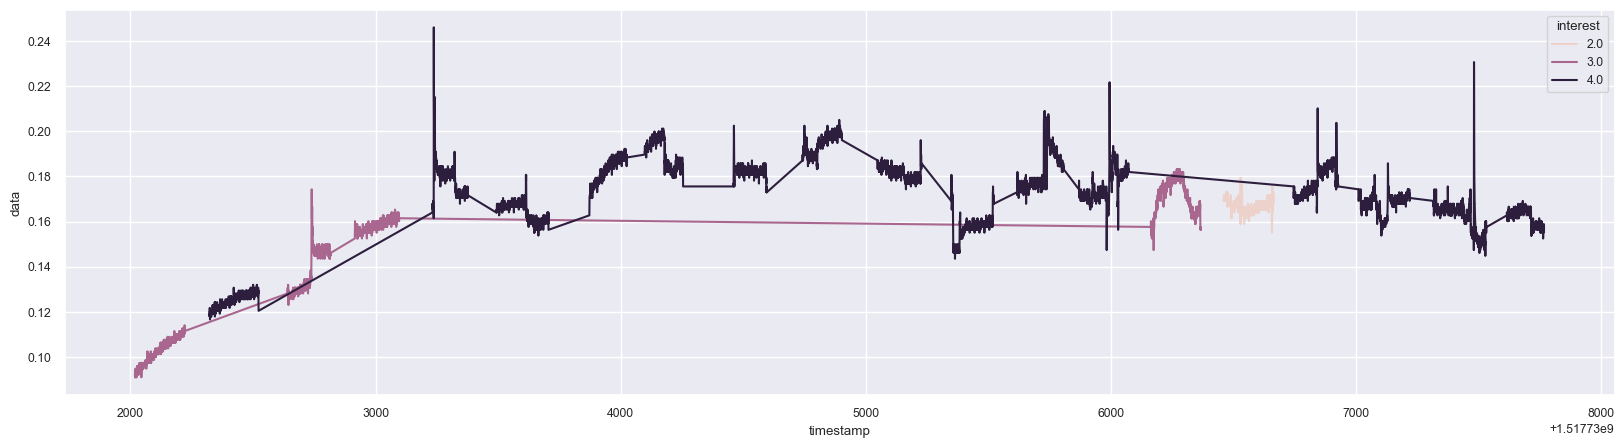

In [289]:
plt.figure(figsize=(20,5))
sns.lineplot(data=eda_df, x=eda_df['timestamp'], y=eda_df['data'], hue=eda_df['interest'])

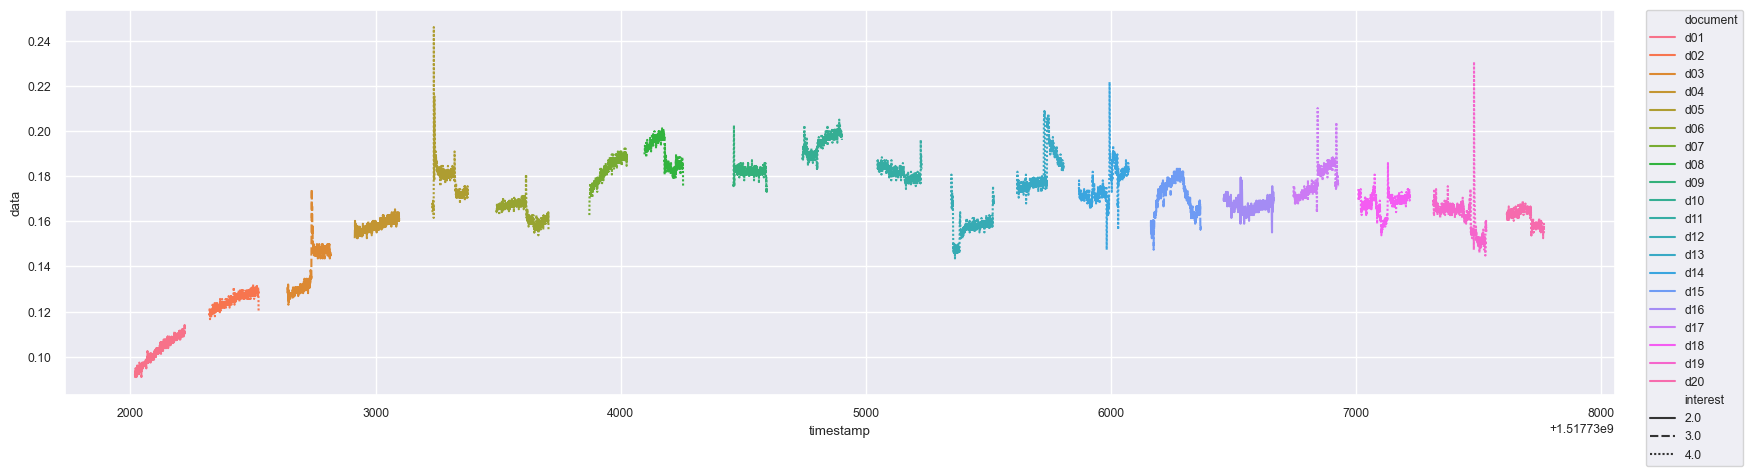

In [292]:
plt.figure(figsize=(20,5))
sns.lineplot(data=eda_df, x=eda_df['timestamp'], y=eda_df['data'], hue=eda_df['document'], style=eda_df['interest'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [271]:
plt.figure(figsize=(20,5))

sns.lineplot(data=bvp_df, x=bvp_df['timestamp'], y=bvp_df['data'], hue=bvp_df['document'])

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

In [272]:
plt.figure(figsize=(20,5))

#sns.lineplot(data=eda_df, x=eda_df['timestamp'], y=eda_df['data'], hue=eda_df['interest'])

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

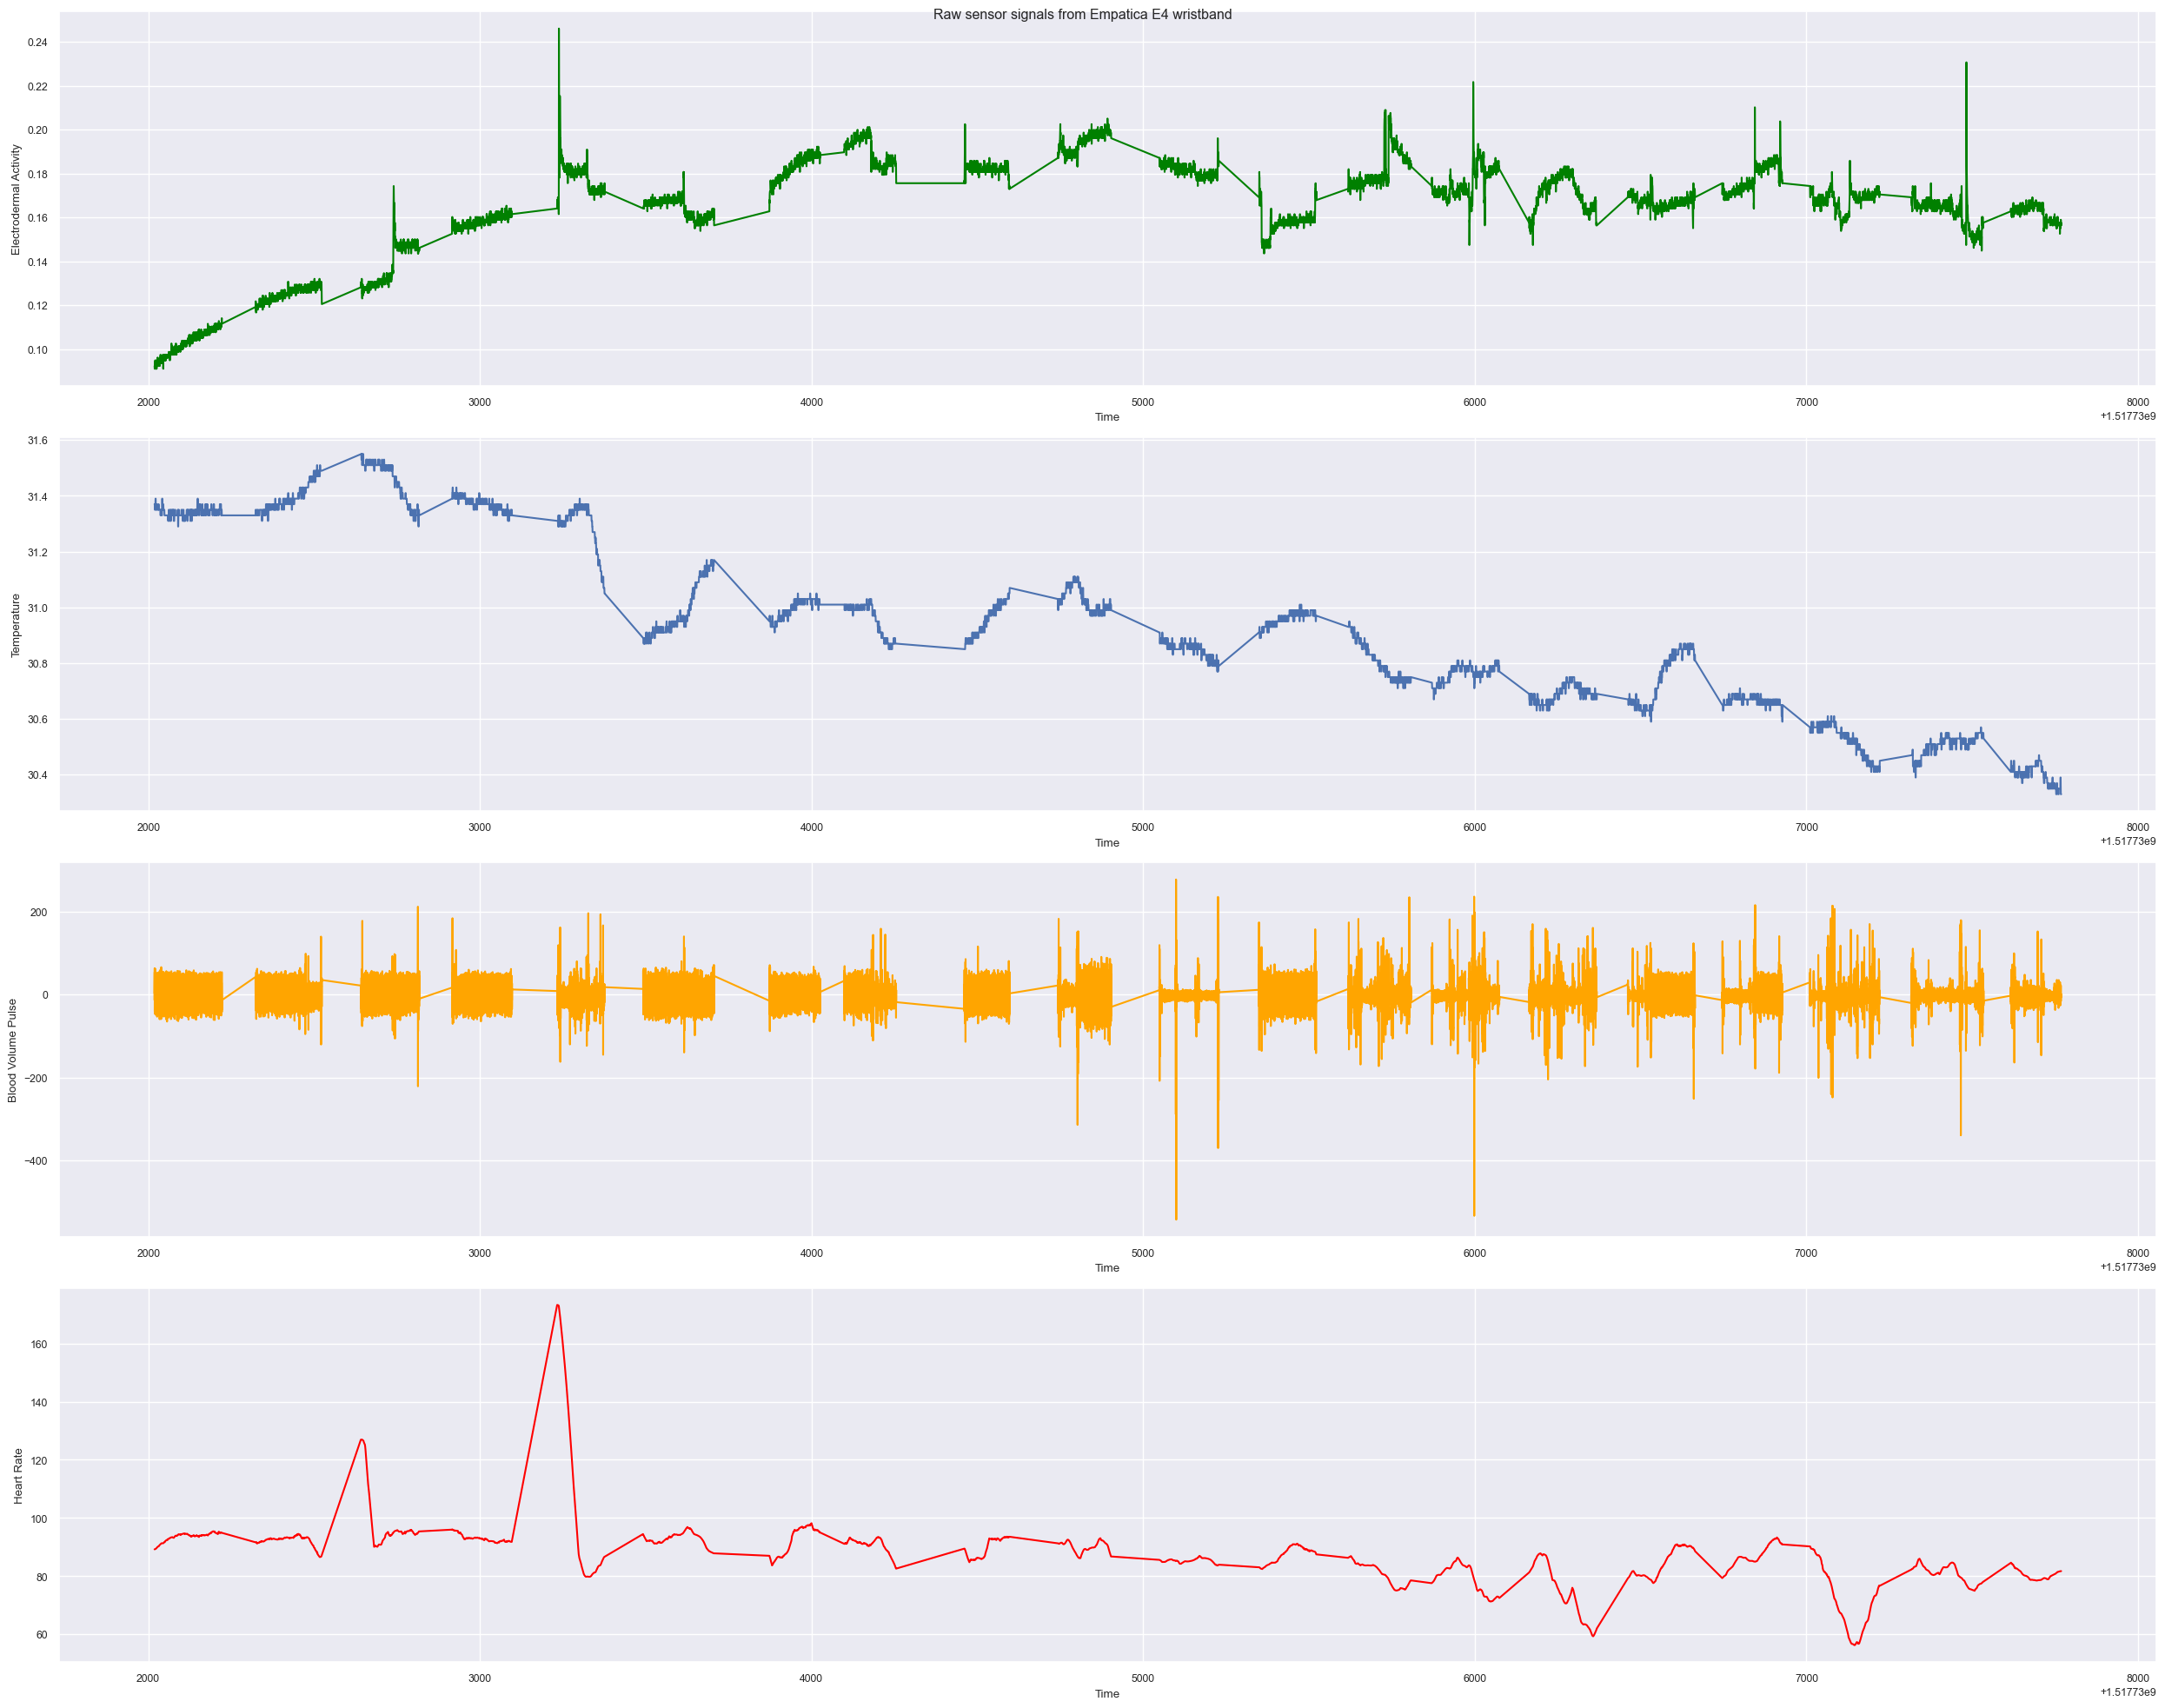

In [293]:

plt.figure(figsize=(25, 20))
plt.subplot(4, 1, 1)
plt.plot(eda_x, eda_y, color='green')
#plt.axvline(x=480, color='red', linestyle='dashed', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Electrodermal Activity')
#plt.xlim([0, 500])


plt.subplot(4, 1, 2)
plt.plot(temp_x, temp_y)
#plt.axvline(x=480, color='red', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Temperature')
#plt.xlim([0, 500])


plt.subplot(4, 1, 3)
plt.plot(bvp_x, bvp_y, color='orange')
#plt.axvline(x=480, color='red', linestyle='dashed', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Blood Volume Pulse')
#plt.xlim([0, 500])

plt.subplot(4, 1, 4)
plt.plot(hr_x, hr_y, color='red')
#plt.axvline(x=480, color='red', linestyle='dashed', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Heart Rate')
#plt.xlim([0, 500])


plt.suptitle('Raw sensor signals from Empatica E4 wristband')
plt.tight_layout()
#plt.show()
plt.savefig("/Users/jai/Documents/IEEE-Interest/plots/E4-signalsp11.pdf", bbox_inches='tight')

In [279]:
df1 = pd.read_csv(main_dir + "p11_EDA.csv", index_col=0)
df1 = df1[df1['interest'].notnull()]

<AxesSubplot:xlabel='timestamp', ylabel='data'>

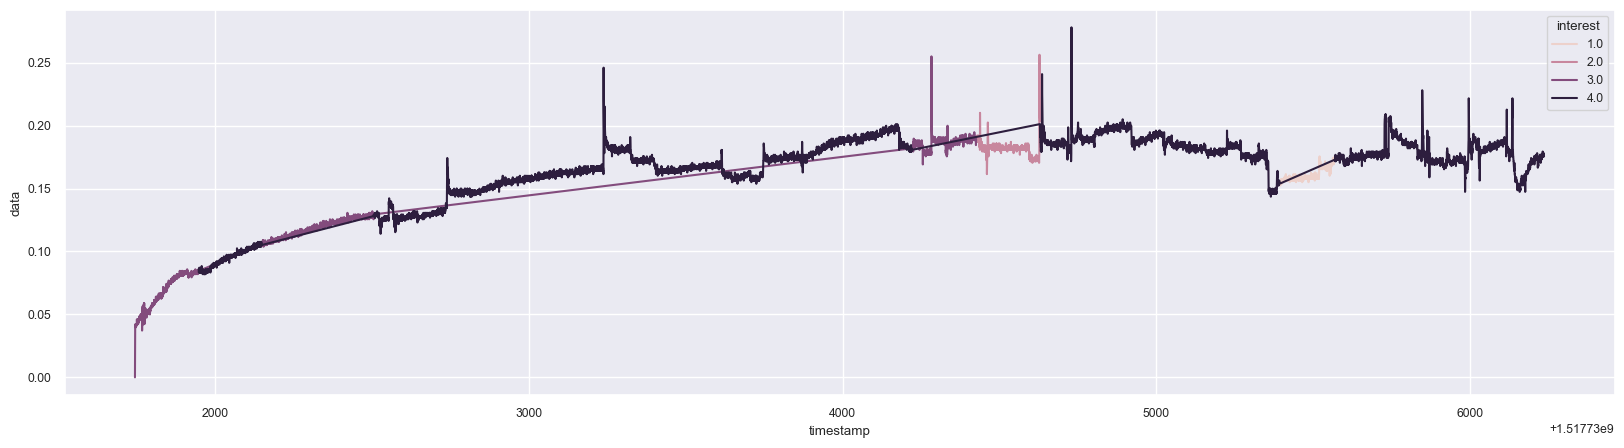

In [284]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df1, x=df1['timestamp'], y=df1['data'], hue=df1['interest'])


In [175]:
eda_data = main_dir + "E4_timestamps/p11_EDA.csv"
bvp_data = main_dir + "E4_timestamps/p11_BVP.csv"

eda_signal = pd.read_csv(eda_data)["data"].values
bvp_signal = pd.read_csv(bvp_data)["data"].values

#signals, info = nk.eda_process(eda_signal, sampling_rate=4)
def eda_custom_process(eda_signal, sampling_rate=4, method="neurokit"):
    

    eda_signal = nk.signal_sanitize(eda_signal)
    
    # Series check for non-default index
    if type(eda_signal) is pd.Series and type(eda_signal.index) != pd.RangeIndex:
        eda_signal = eda_signal.reset_index(drop=True)
    
    # Preprocess
    eda_cleaned = eda_signal  #Add your custom cleaning module here or skip cleaning
    eda_decomposed = nk.eda_phasic(eda_cleaned, sampling_rate=sampling_rate)

    # Find peaks
    peak_signal, info = nk.eda_peaks(
        eda_decomposed["EDA_Phasic"].values,
        sampling_rate=sampling_rate,
        method=method,
        amplitude_min=0.1,
    )
    info['sampling_rate'] = sampling_rate  # Add sampling rate in dict info

    # Store
    signals = pd.DataFrame({"EDA_Raw": eda_signal, "EDA_Clean": eda_cleaned})

    signals = pd.concat([signals, eda_decomposed, peak_signal], axis=1)

    return signals, info

In [176]:
signals, info = eda_custom_process(eda_signal)

<AxesSubplot:>

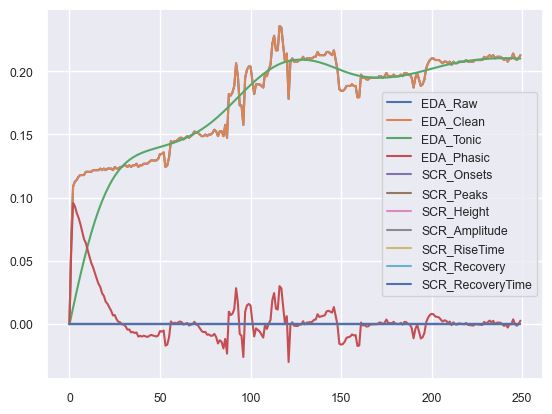

In [177]:
x = signals[0:250]
x.plot()

<Figure size 2500x2000 with 0 Axes>

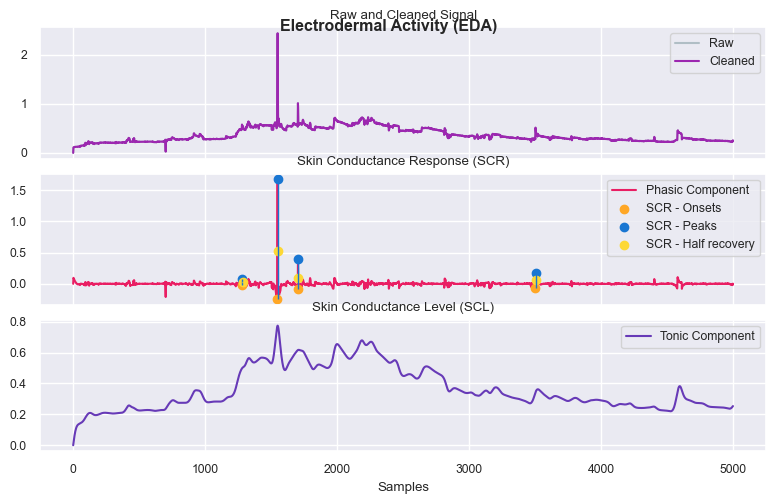

In [299]:
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

df1 = signals.apply(lambda col: pd.Series(col.unique()))
plt.figure(figsize=(25, 20))

nk.eda_plot(signals[0:5000])
#plt.savefig("/Users/jai/Documents/IEEE-Interest/plots/EDA_features.pdf", bbox_inches='tight')
plt.savefig("/Users/jai/Documents/IEEE-Interest/plots/EDA_features.png", bbox_inches='tight')

In [160]:
signals.index

RangeIndex(start=0, stop=34602, step=1)

Text(0, 0.5, 'Heart Rate')

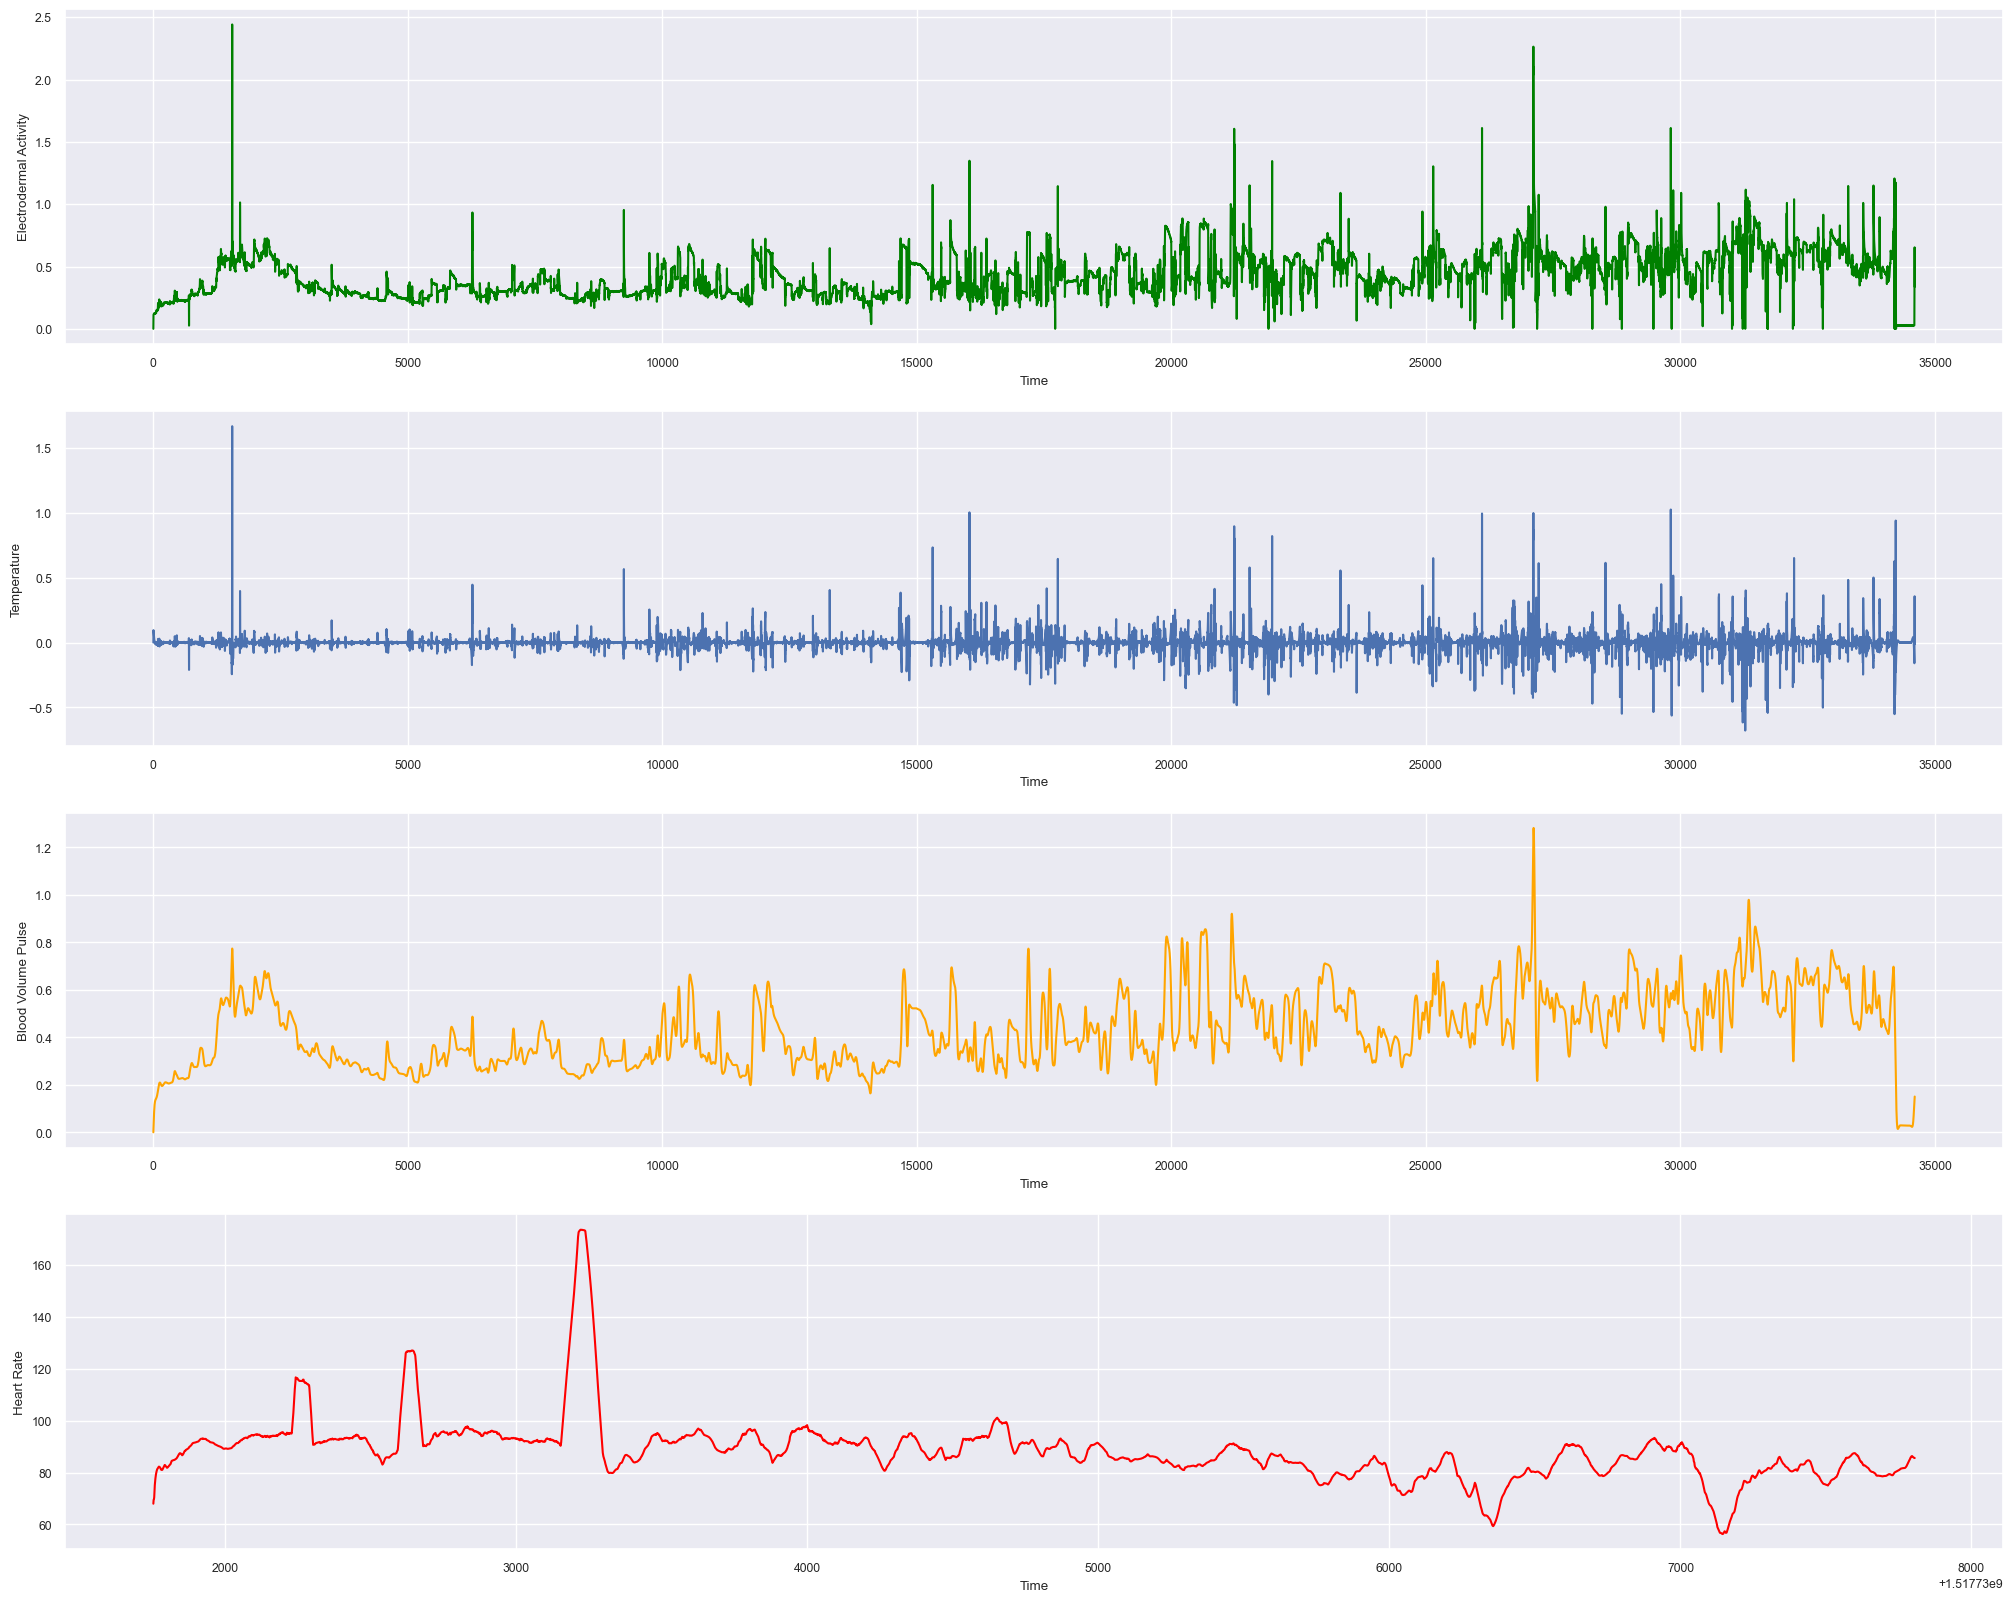

In [163]:
plt.figure(figsize=(25, 20))
plt.subplot(4, 1, 1)
plt.plot(signals.index, signals['EDA_Raw'], color='green')
#plt.axvline(x=480, color='red', linestyle='dashed', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Electrodermal Activity')
#plt.xlim([0, 500])


plt.subplot(4, 1, 2)
plt.plot(signals.index, signals['EDA_Phasic'])
#plt.axvline(x=480, color='red', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Temperature')
#plt.xlim([0, 500])


plt.subplot(4, 1, 3)
plt.plot(signals.index, signals['EDA_Tonic'], color='orange')
#plt.axvline(x=480, color='red', linestyle='dashed', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Blood Volume Pulse')
#plt.xlim([0, 500])

plt.subplot(4, 1, 4)
plt.plot(hr_x, hr_y, color='red')
#plt.axvline(x=480, color='red', linestyle='dashed', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Heart Rate')
#plt.xlim([0, 500])


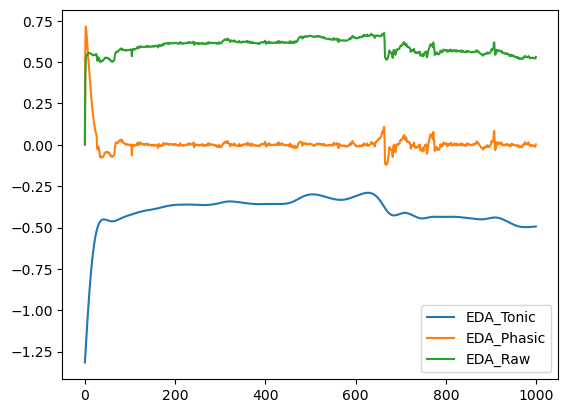

In [144]:
data["EDA_Raw"] = eda_signal  # Add raw signal
data_plot = dat
data_plot.plot()
#plt.savefig("/Users/jai/Documents/IEEE-Interest/plots/EDA_features.pdf", bbox_inches='tight')


PermissionError: [Errno 1] Operation not permitted: '/Users/jai/Documents/IEEE-Interest/plots/BVP_features.pdf'

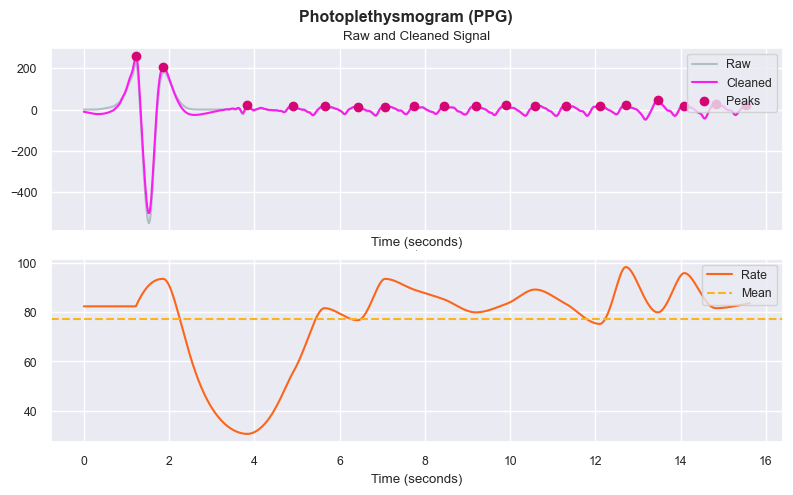

In [300]:
signals_bvp, info_bvp = nk.ppg_process(bvp_signal, sampling_rate=64)

# Visualize the processing

fig = nk.ppg_plot(signals_bvp[0:1000], sampling_rate=64)
plt.title('HR', fontdict={'fontsize': 0.5, 'fontweight': 'medium'})
plt.savefig("/Users/jai/Documents/IEEE-Interest/plots/BVP_features.pdf", bbox_inches='tight')


In [117]:
import numpy as np
import cvxopt as cv
import cvxopt.solvers

def cvxEDA(y, delta, tau0=2., tau1=0.7, delta_knot=10., alpha=8e-4, gamma=1e-2,
           solver=None, options={'reltol':1e-9}):
    """CVXEDA Convex optimization approach to electrodermal activity processing
    This function implements the cvxEDA algorithm described in "cvxEDA: a
    Convex Optimization Approach to Electrodermal Activity Processing"
    (http://dx.doi.org/10.1109/TBME.2015.2474131, also available from the
    authors' homepages).
    Arguments:
       y: observed EDA signal (we recommend normalizing it: y = zscore(y))
       delta: sampling interval (in seconds) of y
       tau0: slow time constant of the Bateman function
       tau1: fast time constant of the Bateman function
       delta_knot: time between knots of the tonic spline function
       alpha: penalization for the sparse SMNA driver
       gamma: penalization for the tonic spline coefficients
       solver: sparse QP solver to be used, see cvxopt.solvers.qp
       options: solver options, see:
                http://cvxopt.org/userguide/coneprog.html#algorithm-parameters
    Returns (see paper for details):
       r: phasic component
       p: sparse SMNA driver of phasic component
       t: tonic component
       l: coefficients of tonic spline
       d: offset and slope of the linear drift term
       e: model residuals
       obj: value of objective function being minimized (eq 15 of paper)
    """

    n = len(y)
    y = cv.matrix(y)

    # bateman ARMA model
    a1 = 1./min(tau1, tau0) # a1 > a0
    a0 = 1./max(tau1, tau0)
    ar = np.array([(a1*delta + 2.) * (a0*delta + 2.), 2.*a1*a0*delta**2 - 8.,
        (a1*delta - 2.) * (a0*delta - 2.)]) / ((a1 - a0) * delta**2)
    ma = np.array([1., 2., 1.])

    # matrices for ARMA model
    i = np.arange(2, n)
    A = cv.spmatrix(np.tile(ar, (n-2,1)), np.c_[i,i,i], np.c_[i,i-1,i-2], (n,n))
    M = cv.spmatrix(np.tile(ma, (n-2,1)), np.c_[i,i,i], np.c_[i,i-1,i-2], (n,n))

    # spline
    delta_knot_s = int(round(delta_knot / delta))
    spl = np.r_[np.arange(1.,delta_knot_s), np.arange(delta_knot_s, 0., -1.)] # order 1
    spl = np.convolve(spl, spl, 'full')
    spl /= max(spl)
    # matrix of spline regressors
    i = np.c_[np.arange(-(len(spl)//2), (len(spl)+1)//2)] + np.r_[np.arange(0, n, delta_knot_s)]
    nB = i.shape[1]
    j = np.tile(np.arange(nB), (len(spl),1))
    p = np.tile(spl, (nB,1)).T
    valid = (i >= 0) & (i < n)
    B = cv.spmatrix(p[valid], i[valid], j[valid])

    # trend
    C = cv.matrix(np.c_[np.ones(n), np.arange(1., n+1.)/n])
    nC = C.size[1]

    # Solve the problem:
    # .5*(M*q + B*l + C*d - y)^2 + alpha*sum(A,1)*p + .5*gamma*l'*l
    # s.t. A*q >= 0

    old_options = cv.solvers.options.copy()
    cv.solvers.options.clear()
    cv.solvers.options.update(options)
    if solver == 'conelp':
        # Use conelp
        z = lambda m,n: cv.spmatrix([],[],[],(m,n))
        G = cv.sparse([[-A,z(2,n),M,z(nB+2,n)],[z(n+2,nC),C,z(nB+2,nC)],
                    [z(n,1),-1,1,z(n+nB+2,1)],[z(2*n+2,1),-1,1,z(nB,1)],
                    [z(n+2,nB),B,z(2,nB),cv.spmatrix(1.0, range(nB), range(nB))]])
        h = cv.matrix([z(n,1),.5,.5,y,.5,.5,z(nB,1)])
        c = cv.matrix([(cv.matrix(alpha, (1,n)) * A).T,z(nC,1),1,gamma,z(nB,1)])
        res = cv.solvers.conelp(c, G, h, dims={'l':n,'q':[n+2,nB+2],'s':[]})
        obj = res['primal objective']
    else:
        # Use qp
        Mt, Ct, Bt = M.T, C.T, B.T
        H = cv.sparse([[Mt*M, Ct*M, Bt*M], [Mt*C, Ct*C, Bt*C], 
                    [Mt*B, Ct*B, Bt*B+gamma*cv.spmatrix(1.0, range(nB), range(nB))]])
        f = cv.matrix([(cv.matrix(alpha, (1,n)) * A).T - Mt*y,  -(Ct*y), -(Bt*y)])
        res = cv.solvers.qp(H, f, cv.spmatrix(-A.V, A.I, A.J, (n,len(f))),
                            cv.matrix(0., (n,1)), solver=solver)
        obj = res['primal objective'] + .5 * (y.T * y)
    cv.solvers.options.clear()
    cv.solvers.options.update(old_options)

    l = res['x'][-nB:]
    d = res['x'][n:n+nC]
    t = B*l + C*d
    q = res['x'][:n]
    p = A * q
    r = M * q
    e = y - r - t

    return (np.array(a).ravel() for a in (r, p, t, l, d, e, obj))

     pcost       dcost       gap    pres   dres
 0: -1.2023e+04 -1.1954e+04  6e+04  2e+02  2e-01
 1: -1.2029e+04 -2.3895e+04  2e+04  5e+01  6e-02
 2: -1.2041e+04 -1.5494e+04  4e+03  9e+00  9e-03
 3: -1.2044e+04 -1.3547e+04  2e+03  3e+00  3e-03
 4: -1.2041e+04 -1.2875e+04  8e+02  1e+00  1e-03
 5: -1.2044e+04 -1.2364e+04  3e+02  5e-01  5e-04
 6: -1.2045e+04 -1.2170e+04  1e+02  1e-01  1e-04
 7: -1.2072e+04 -1.2103e+04  3e+01  2e-02  2e-05
 8: -1.2084e+04 -1.2096e+04  1e+01  4e-03  4e-06
 9: -1.2088e+04 -1.2094e+04  6e+00  1e-03  1e-06
10: -1.2091e+04 -1.2093e+04  2e+00  3e-04  4e-07
11: -1.2092e+04 -1.2093e+04  7e-01  8e-05  8e-08
12: -1.2093e+04 -1.2093e+04  2e-01  2e-05  2e-08
13: -1.2093e+04 -1.2093e+04  5e-02  3e-06  3e-09
14: -1.2093e+04 -1.2093e+04  1e-02  7e-07  8e-10
15: -1.2093e+04 -1.2093e+04  3e-03  1e-07  1e-10
16: -1.2093e+04 -1.2093e+04  5e-04  2e-08  2e-11
17: -1.2093e+04 -1.2093e+04  7e-05  2e-09  2e-12
18: -1.2093e+04 -1.2093e+04  5e-06  1e-10  1e-13
Optimal solution foun

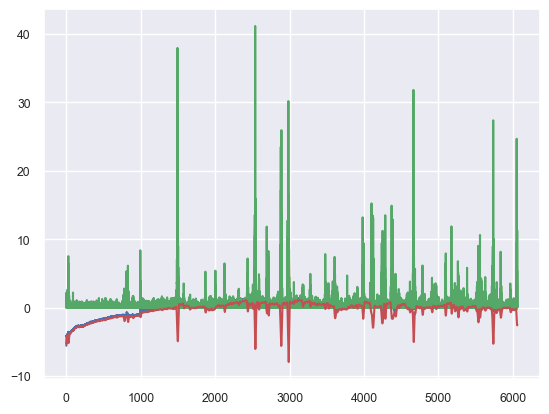

In [125]:
#import cvxEDA
yn = (eda_y - eda_y.mean()) / eda_y.std()
Fs = 4.
[r, p, t, l, d, e, obj] = cvxEDA(yn, 1./Fs)
import pylab as pl
tm = pl.arange(1., len(eda_y)+1.) / Fs
#pl.hold(True)
pl.plot(tm, yn)
pl.plot(tm, r)
pl.plot(tm, p)
pl.plot(tm, t)
pl.show()

In [311]:
import numpy as np
import dalmatian

labels = ["1","2","3","4"]
data = np.array([
  [46, 37, 12, 6],
  [34, 22, 31, 13],
  [9, 22, 27, 42],
  [3, 5, 34, 58],
  ])

mx = dalmatian.Matrix(labels, data)

#Options
mx.cell_size = 28.2 #[mm]
mx.font_size = 14
mx.label_font_size = 7
mx.cell_color = "blue" #black, red, yellow, green, blue, purple
mx.label_color = "black" #black, white
mx.line_type = "dot" #normal, dot
mx.percentage = True

mx.draw()

>> Exported a matrix to ./out.pdf
